In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import os
import pathlib

In [2]:
for dirpath, dirnames, filenames in os.walk("data/CIFAR-10-images/"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'data/CIFAR-10-images/'.
There are 10 directories and 0 images in 'data/CIFAR-10-images/test'.
There are 0 directories and 1000 images in 'data/CIFAR-10-images/test/cat'.
There are 0 directories and 1000 images in 'data/CIFAR-10-images/test/dog'.
There are 0 directories and 1000 images in 'data/CIFAR-10-images/test/truck'.
There are 0 directories and 1000 images in 'data/CIFAR-10-images/test/bird'.
There are 0 directories and 1000 images in 'data/CIFAR-10-images/test/airplane'.
There are 0 directories and 1000 images in 'data/CIFAR-10-images/test/ship'.
There are 0 directories and 1000 images in 'data/CIFAR-10-images/test/frog'.
There are 0 directories and 1000 images in 'data/CIFAR-10-images/test/horse'.
There are 0 directories and 1000 images in 'data/CIFAR-10-images/test/deer'.
There are 0 directories and 1000 images in 'data/CIFAR-10-images/test/automobile'.
There are 10 directories and 0 images in 'data/CIFAR-10-images/train'.
There are 0 di

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import os
import pathlib

# get class names from folders
data_dir = pathlib.Path("data/CIFAR-10-images/train/")  # turn our training path into a Python path

class_names = np.array(sorted(os.listdir(data_dir))) # TODO: create a list of class_names from the subdirectories
print(class_names, len(class_names))

['airplane' 'automobile' 'bird' 'cat' 'deer' 'dog' 'frog' 'horse' 'ship'
 'truck'] 10


In [4]:
# associate class names with numbers, machinelaerning and deeplearning works with numbers!
class_names_dict =  dict(enumerate(class_names)) # TODO: create the dictionary
len(class_names_dict), class_names_dict

(10,
 {0: 'airplane',
  1: 'automobile',
  2: 'bird',
  3: 'cat',
  4: 'deer',
  5: 'dog',
  6: 'frog',
  7: 'horse',
  8: 'ship',
  9: 'truck'})

In [5]:
import random
import matplotlib.image as mpimg


def display_random_img(target_dir, target_class):
    target_folder = target_dir + target_class
    random_image = random.sample(os.listdir(target_folder), 1)

    img = mpimg.imread(target_folder + "/" + random_image[0])

    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");
    print(f"Image shape: {img.shape}")

    return img

Image shape: (32, 32, 3)


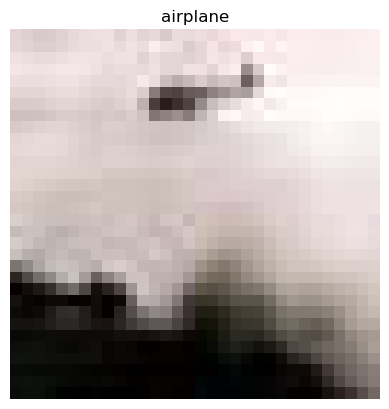

In [6]:
# Display a random image
img =  display_random_img(str(data_dir)+'/', class_names[0]) # TODO: Call display_random_img(target_dir, target_class) right here

Image shape: (32, 32, 3)
Image shape: (32, 32, 3)
Image shape: (32, 32, 3)
Image shape: (32, 32, 3)
Image shape: (32, 32, 3)
Image shape: (32, 32, 3)
Image shape: (32, 32, 3)
Image shape: (32, 32, 3)
Image shape: (32, 32, 3)


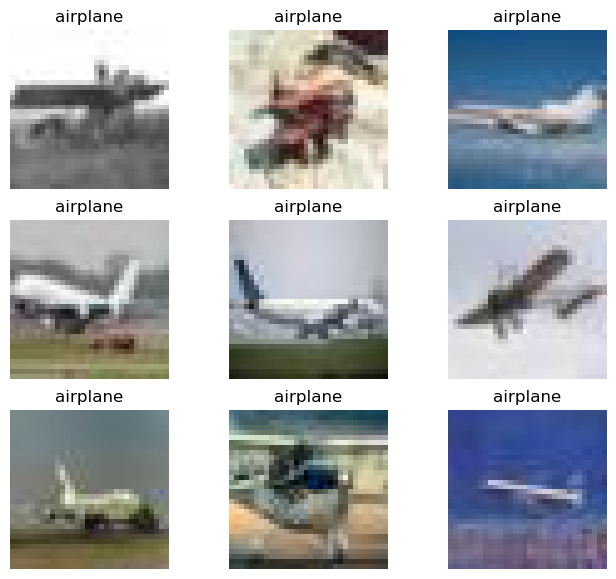

In [7]:
# Display multiple images from the data set
plt.figure(figsize=(8, 7))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img =  display_random_img(str(data_dir)+'/', class_names[0]) # TODO: Call display_random_img(target_dir, target_class) right here (Care: pass the right target class!)
    plt.axis(False)

In [8]:
# TODO: Display image as array
image2array = np.asarray(img)

In [9]:
# TODO: Display image shape (Remember, the image datatype should be a Numpy Array -> https://numpy.org/doc/stable/reference/generated/numpy.shape.html)
np.shape(image2array)

(32, 32, 3)

In [10]:
def load_images_as_features_and_labels(target_dir, class_name_dictionary):
    """
    returns 
    X -- images as numpy array
    y -- labels as numpy array
    """

    # TODO: Add your code here
    X = []
    y = []
    
    for i in range(0, len(class_names_dict)):
        for filenames in os.walk(target_dir+class_names_dict[i]):
            #print(filenames)
            
            for file in filenames[2]: 
                image_path = pathlib.Path(filenames[0]+ '/' + file)
                X.append((mpimg.imread(image_path))/255)
                y.append(i)       
    X = np.asarray(X)
    y = np.asarray(y)
    return X, y

In [11]:
X_train, y_train = load_images_as_features_and_labels('data/CIFAR-10-images/train/', class_names_dict)
X_test, y_test = load_images_as_features_and_labels('data/CIFAR-10-images/test/', class_names_dict)
X_train, y_train, X_test, y_test

(array([[[[0.6627451 , 0.7372549 , 0.79215686],
          [0.65882353, 0.73333333, 0.78823529],
          [0.65098039, 0.7254902 , 0.78039216],
          ...,
          [0.63529412, 0.7372549 , 0.78823529],
          [0.61960784, 0.72156863, 0.78039216],
          [0.60392157, 0.70588235, 0.76470588]],
 
         [[0.65882353, 0.73333333, 0.78823529],
          [0.65490196, 0.72941176, 0.78431373],
          [0.65098039, 0.7254902 , 0.78039216],
          ...,
          [0.64313725, 0.73333333, 0.78823529],
          [0.64313725, 0.74509804, 0.80392157],
          [0.61176471, 0.71372549, 0.77254902]],
 
         [[0.65882353, 0.73333333, 0.78823529],
          [0.65490196, 0.72941176, 0.78431373],
          [0.64705882, 0.72156863, 0.77647059],
          ...,
          [0.63137255, 0.72156863, 0.77647059],
          [0.62745098, 0.71764706, 0.77254902],
          [0.61568627, 0.70588235, 0.76862745]],
 
         ...,
 
         [[0.72156863, 0.75294118, 0.76078431],
          [0.72156

In [12]:
# TODO: Add your code here
print(np.shape(X_train))
print(np.shape(y_train))
print(np.shape(X_test))
print(np.shape(y_test))

(50000, 32, 32, 3)
(50000,)
(10000, 32, 32, 3)
(10000,)


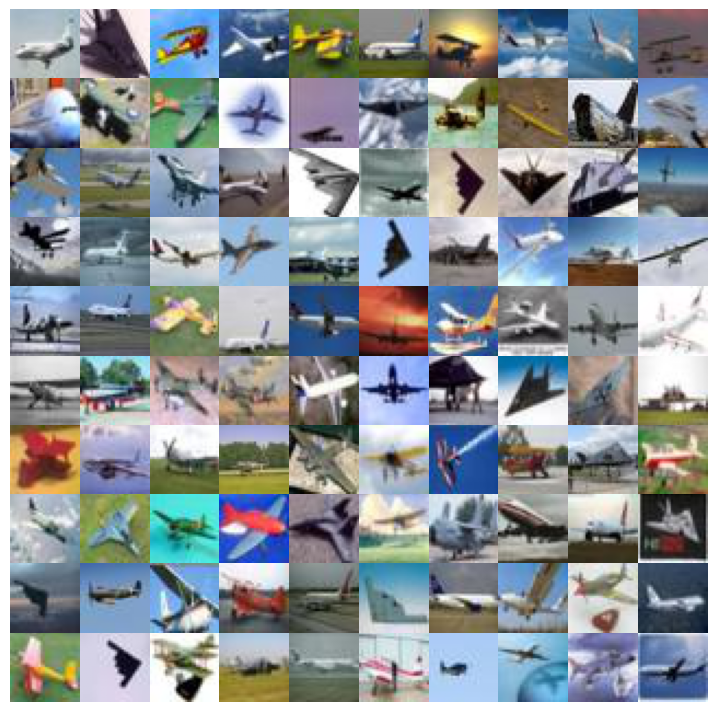

In [13]:
def print_multiple_figures(images_array):
    plt.figure(figsize=(9, 9))
    for idx, img in enumerate(images_array[:100]):
        plt.subplot(10, 10, idx + 1)
        plt.imshow(img, cmap="binary")
        plt.axis("off")
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()
    
print_multiple_figures(X_train)

In [14]:
# Random forest classifier needs input in shape of (batch, flattended image) i.e (50000, 3072) -> 32*32*3  = 3072
# ADD your code here
    
X_train_flattened = np.reshape(X_train, (-1, 32*32*3))
X_test_flattened = np.reshape(X_test, (-1, 32*32*3))
X_train_flattened.shape, X_test_flattened.shape

((50000, 3072), (10000, 3072))

In [15]:
#% % time
from sklearn.ensemble import RandomForestClassifier


# https://www.kaggle.com/code/prashant111/random-forest-classifier-tutorial
# n_estimators = 100 is default. The higher the more accurate.
rnf_clf = RandomForestClassifier() #TODO: load the classifier
# TODO: train the classifier on the data set
rnf_clf.fit(X_train_flattened, y_train)
# Just to signal because it takes a while to do
print("Done")

Done


In [16]:
y_pred_clf = rnf_clf.predict(X_test_flattened) # TODO: Use the trained classifier to make predictions

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# TODO: Add your code here
accuracy_score(y_test, y_pred_clf)
precision_score(y_test, y_pred_clf, average=None)
recall_score(y_test, y_pred_clf, average=None)
f1_score(y_test, y_pred_clf, average=None)

array([0.55121227, 0.53816794, 0.34125726, 0.31793179, 0.39520958,
       0.41264904, 0.50877193, 0.47823807, 0.59288152, 0.49834515])

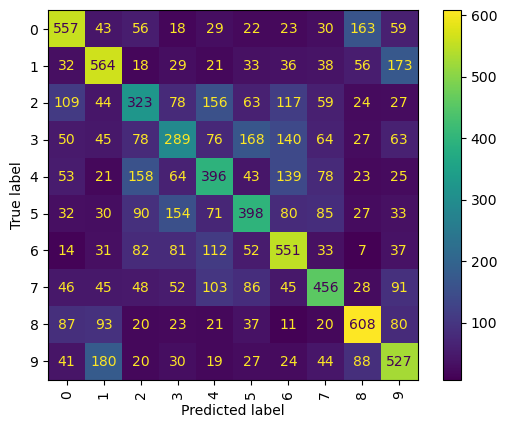

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_clf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names_dict.keys())
disp.plot(xticks_rotation='vertical')
plt.show()

In [19]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.__version__  # IMPORTANT: This should print '2.8.0', if your version is newer, you might not be able to use your GPU for training!

'2.7.0'

In [20]:
from tensorflow.keras import mixed_precision

gpu_devices = tf.config.list_physical_devices('GPU')
if gpu_devices:
    details = tf.config.experimental.get_device_details(gpu_devices[0])
    print(f"Your GPUs compute capability is {details['compute_capability'][:]}")
    if details['compute_capability'][0] >= 7.0:
        mixed_precision.set_global_policy('mixed_float16')
        print(f"Your global policy has been set to: {mixed_precision.global_policy()}")
    else:
        print(
            f"Your GPU does not support mixed precision, the global policy is left at: {mixed_precision.global_policy()}")
else:
    print("No GPU device could be found on your machine")

No GPU device could be found on your machine


In [74]:
train_dir = "data/CIFAR-10-images/train/"
test_dir = "data/CIFAR-10-images/test/"

BATCH_SIZE = 64
img_height = 32
img_width = img_height

train_data =  tf.keras.utils.image_dataset_from_directory(
train_dir,
image_size=(img_height,img_width),
batch_size = BATCH_SIZE,
shuffle = True,
label_mode='categorical'
)# TODO load the training set
print(train_data)
test_data =  tf.keras.utils.image_dataset_from_directory(
test_dir,
image_size=(img_height,img_width),
batch_size = BATCH_SIZE,
label_mode='categorical'
)# TODO load the testing set

Found 50000 files belonging to 10 classes.
<BatchDataset shapes: ((None, 32, 32, 3), (None, 10)), types: (tf.float32, tf.float32)>
Found 10000 files belonging to 10 classes.


In [75]:
num_classes = len(train_data.class_names)
print(num_classes)

10


In [76]:
# create a sequential model which will be added as a layer in the model
from tensorflow.keras.layers.experimental import preprocessing

data_augmentation =  tf.keras.Sequential(
    [
        tf.keras.layers.Rescaling(1./255),
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.1),
        tf.keras.layers.RandomZoom(0.1),
        tf.keras.layers.Reshape([32, 32, 3])
    ]
) #TODO: Build your sequential model here



In [87]:
# build model with functional api

inputs = tf.keras.layers.Input(shape=(32, 32, 3), name='input_layer')
x = data_augmentation(inputs)# TODO: add your augmentation layer/model after the input layer
outputs = tf.keras.layers.Dense(10)(x)

model =  tf.keras.Model(inputs=inputs, outputs=outputs)# TODO: use keras.Model() to build your model
model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 sequential_4 (Sequential)   (None, 32, 32, 3)         0         
                                                                 
 dense_23 (Dense)            (None, 32, 32, 10)        40        
                                                                 
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


In [88]:
# TODO: compile your model here
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.Accuracy(),
             tf.keras.metrics.Recall(),
             tf.keras.metrics.Precision()]
)

In [89]:
history =  model.fit(train_data)# TODO: fit your model here

ValueError: in user code:

    File "/opt/miniconda3/envs/lab02/lib/python3.10/site-packages/keras/engine/training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "/opt/miniconda3/envs/lab02/lib/python3.10/site-packages/keras/engine/training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/miniconda3/envs/lab02/lib/python3.10/site-packages/keras/engine/training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "/opt/miniconda3/envs/lab02/lib/python3.10/site-packages/keras/engine/training.py", line 809, in train_step
        loss = self.compiled_loss(
    File "/opt/miniconda3/envs/lab02/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/opt/miniconda3/envs/lab02/lib/python3.10/site-packages/keras/losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "/opt/miniconda3/envs/lab02/lib/python3.10/site-packages/keras/losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/opt/miniconda3/envs/lab02/lib/python3.10/site-packages/keras/losses.py", line 1664, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/opt/miniconda3/envs/lab02/lib/python3.10/site-packages/keras/backend.py", line 4994, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 10) and (None, 32, 32, 10) are incompatible
